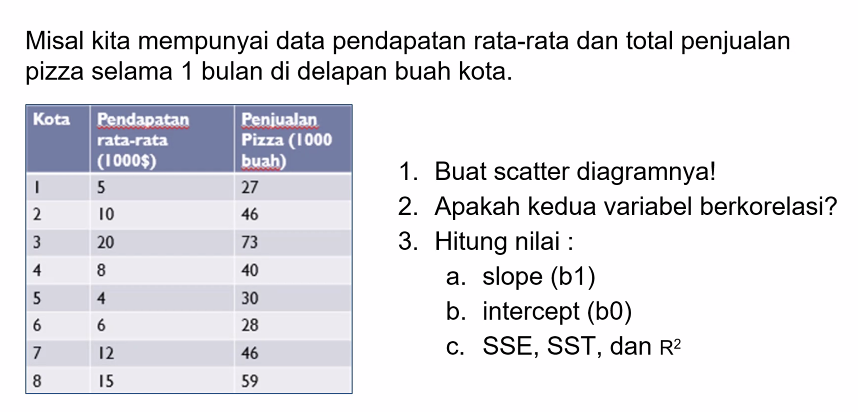

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'pendapatan' : [5, 10, 20, 8, 4, 6, 12, 15],
                   'penjualan' : [27, 46, 73, 40, 30, 28, 46, 59]})
df

,pendapatan,penjualan
0,5,27
1,10,46
2,20,73
3,8,40
4,4,30
5,6,28
6,12,46
7,15,59


In [ ]:
import matplotlib.pyplot as plt

# 1. Scatter

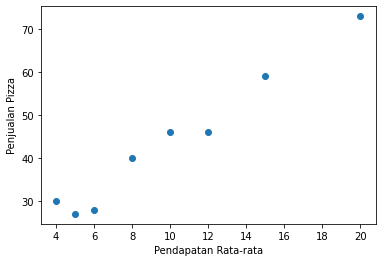

In [ ]:
plt.scatter(df['pendapatan'], df['penjualan'])
plt.xlabel('Pendapatan Rata-rata')
plt.ylabel('Penjualan Pizza')
plt.show()

# 2. Korelasi


In [ ]:
print('Korelasi : ', np.corrcoef(df['pendapatan'], df['penjualan'])[0, 1])

Korelasi :  0.9840325758520435


# 3. Hitung Nilai :

In [ ]:
from scipy.stats import linregress

In [ ]:
linregress(df['pendapatan'], df['penjualan'])

LinregressResult(slope=2.9047619047619047, intercept=14.577380952380953, rvalue=0.9840325758520434, pvalue=1.005608852744126e-05, stderr=0.21449504766406943)

## Slope

In [ ]:
print('Slope : ', linregress(df['pendapatan'], df['penjualan'])[0])

Slope :  2.9047619047619047


## Intercept

In [ ]:
print('Intercept : ', linregress(df['pendapatan'], df['penjualan'])[1])

Intercept :  14.577380952380953


In [ ]:
import numpy as np

In [ ]:
X = np.array(df['pendapatan']).reshape(-1,1)
y = np.array(df['penjualan'])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [ ]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

##  SSE, SST, R^2

In [ ]:
stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     57.9702
sst:     1829.8750
r^2:     0.9683
adj_r^2: 0.9630
